In [57]:
import pandas as pd
import numpy as np

instance = 'A1'

data = pd.read_excel("Data\Instances\Small_Instances.xlsx", sheet_name=instance, index_col=0)
data = data[['X', 'Y']]

In [58]:
def route_plot(data, solution_variables, instance):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(15, 10))

    # plot depots [1, 2]
    # square shape, opacity 0.5
    plt.scatter(data['X'][1], data['Y'][1], color='blue', label='Depot', s=400, marker='s', alpha = 0.5)
    plt.scatter(data['X'][2], data['Y'][2], color='orange', label='Depot', s=400, marker='s', alpha = 0.5)

    # plot satellites [3, 4, 5, 6] (3, 5 belong to LSP 1, 4, 6 belong to LSP 2)
    plt.scatter(data['X'][3], data['Y'][3], color='blue', label='Satellite', s=400, marker='^', alpha = 0.8)
    plt.scatter(data['X'][4], data['Y'][4], color='orange', label='Satellite', s=400, marker='^', alpha = 0.8)
    plt.scatter(data['X'][5], data['Y'][5], color='blue', label='Satellite', s=400, marker='^', alpha = 0.8)
    plt.scatter(data['X'][6], data['Y'][6], color='orange', label='Satellite', s=400, marker='^', alpha = 0.8)

    # plot customers [7-18] (even numbers belong to LSP 1, odd numbers belong to LSP 2) (colour according to LSP)
    for i in range(7, 19):
        if i % 2 == 0:
            plt.scatter(data['X'][i], data['Y'][i], color='blue', label='Customer', s=200, alpha = 0.5)
        else:
            plt.scatter(data['X'][i], data['Y'][i], color='orange', label='Customer', s=200, alpha = 0.5)

    # plot collaboration points [19, 20] as green diamonds
    # plt.scatter(data['X'][19], data['Y'][19], color='green', label='Collaboration Point', s=200, marker='D')
    # plt.scatter(data['X'][20], data['Y'][20], color='green', label='Collaboration Point', s=200, marker='D')

    # plt.scatter(data['X'], data['Y'], color='blue')
    # for i in data.index:
    #     plt.annotate(i, (data['X'][i], data['Y'][i]), color='black')

    # first-echelon
    for variable_name in solution_variables.index:
        if variable_name[0] == 'R':
            point_a = int(variable_name[7])
            point_b = int(variable_name[9])
            if point_a % 2 != 0:

                plt.arrow(data['X'][point_a], 
                        data['Y'][point_a], 
                        data['X'][point_b] - data['X'][point_a], 
                        data['Y'][point_b] - data['Y'][point_a], 
                        color='purple',
                        head_width=0.35,
                        lw = 2)

            else:
                plt.arrow(data['X'][point_a],
                        data['Y'][point_a],
                        data['X'][point_b] - data['X'][point_a], 
                        data['Y'][point_b] - data['Y'][point_a], 
                        color='red',
                        head_width=0.35,
                        lw = 2)
            
    # second-echelon
    for variable_name in solution_variables.index:
        if variable_name[0] == 'X':
            point_a = int(variable_name.split(',')[0].split('[')[-1])
            point_b = int(variable_name.split(',')[1])
            vehicle = int(variable_name.split(',')[2][0])
            vehicle_colour_map = {3:'magenta', 4:'turquoise', 5:'green', 6:'black'}
            plt.arrow(data['X'][point_a], 
                    data['Y'][point_a], 
                    data['X'][point_b] - data['X'][point_a], 
                    data['Y'][point_b] - data['Y'][point_a], 
                    color= vehicle_colour_map[vehicle],
                    head_width=0.35)
            
    legend_entries = [
        plt.Line2D([0], [0], color='red', marker='s', markersize=10, label='Depot'),
        plt.Line2D([0], [0], color='red', marker='^', markersize=10, label='Satellite'),
        plt.Line2D([0], [0], color='red', marker='o', markersize=10, label='Customer'),
        # plt.Line2D([0], [0], color='red', marker='D', markersize=10, label='Collaboration Point'),
        # add points for LSPs without any coordinates on the plot
        plt.Line2D([0], [0], color='blue', marker='o', markersize=10, label='LSP 1'),
        plt.Line2D([0], [0], color='orange', marker='o', markersize=10, label='LSP 2'),
    ]
    # add legend mentioning that squares are depots, triangles are satellites, circles are customers, and diamonds are collaboration points, arrows are routes, and colours are according to LSPs
    plt.legend(handles=legend_entries)
    # plt.savefig(f'route_plot({instance}).png')
    # plt.title(f'Route Plot for Instance {instance}, Objective Value: 746.606', fontsize=20, fontweight='bold')
    plt.show()

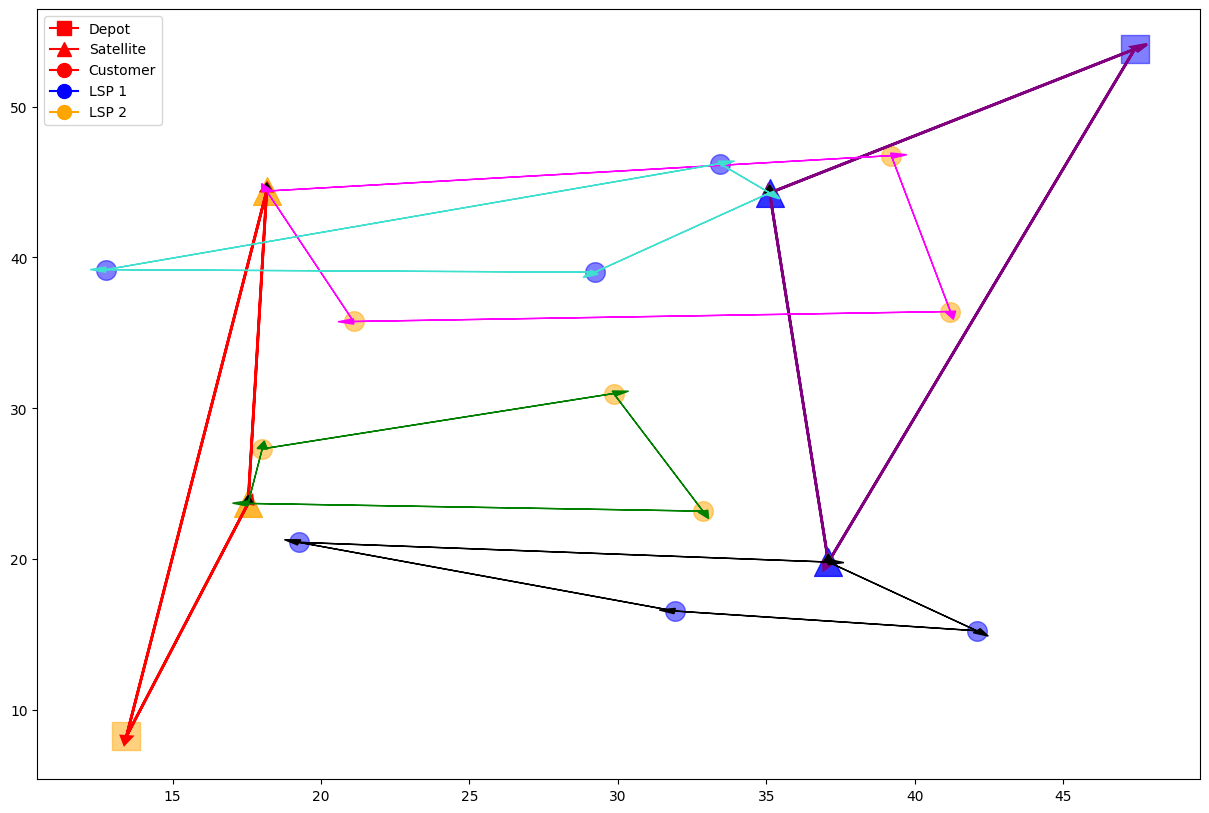

In [59]:
solution_variables = pd.read_excel(r"Results\No Collab\nocollab_solution(A1) - 746.606.xlsx", index_col=0)

route_plot(data, solution_variables, instance)

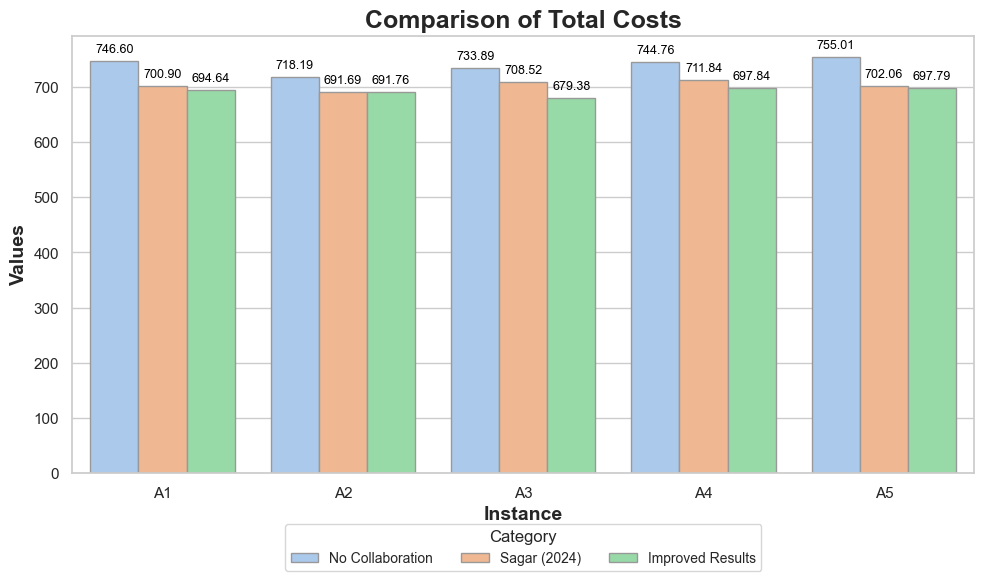

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
data = {
    "Instance": ["A1", "A2", "A3", "A4", "A5"] * 3,
    "Values": [746.6, 718.19, 733.89, 744.76, 755.01,  # No Collaboration
               700.9, 691.69, 708.52, 711.84, 702.06,  # Pingale et al. (2024)
               694.644, 691.763, 679.375, 697.839, 697.794],  # Improved Results
    "Category": ["No Collaboration"] * 5 + ["Sagar (2024)"] * 5 + ["Improved Results"] * 5
}

df = pd.DataFrame(data)

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Instance", y="Values", hue="Category", data=df,
    palette="pastel", edgecolor=".6"
)

# Add labels and title
ax.set_title("Comparison of Total Costs", fontsize=18, fontweight='bold')
ax.set_xlabel("Instance", fontsize=14, fontweight='bold')
ax.set_ylabel("Values", fontsize=14, fontweight='bold')

# Add value annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 4),
                textcoords='offset points')

# Move the legend outside the plot
ax.legend(title="Category", fontsize=10, title_fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Adjust layout
plt.tight_layout()
plt.show()


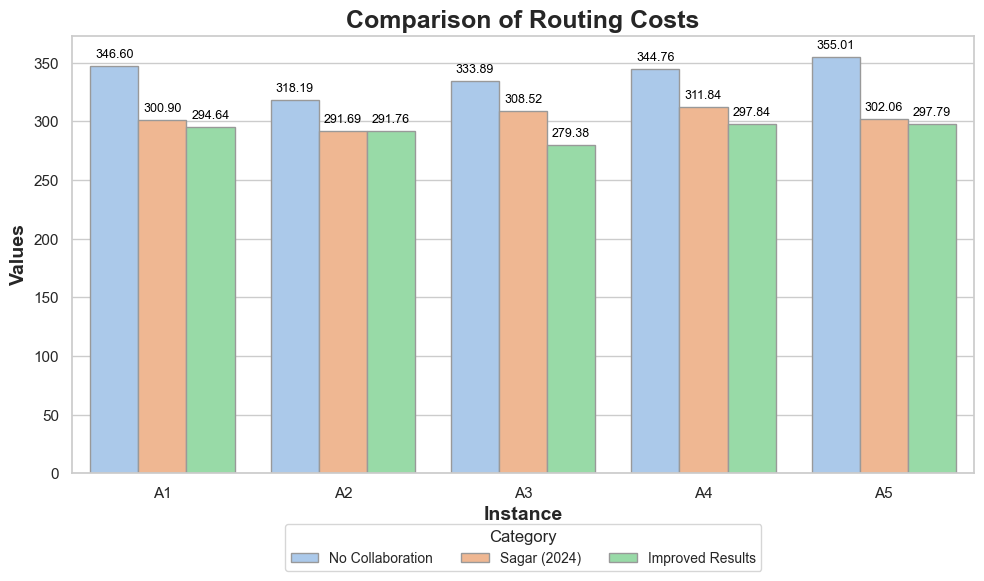

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
data = {
    "Instance": ["A1", "A2", "A3", "A4", "A5"] * 3,
    "Values": [346.6, 318.19, 333.89, 344.76, 355.01,  # No Collaboration
               300.9, 291.69, 308.52, 311.84, 302.06,  # Pingale et al. (2024)
               294.644, 291.763, 279.375, 297.839, 297.794],  # Improved Results
    "Category": ["No Collaboration"] * 5 + ["Sagar (2024)"] * 5 + ["Improved Results"] * 5
}

df = pd.DataFrame(data)

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Instance", y="Values", hue="Category", data=df,
    palette="pastel", edgecolor=".6"
)

# Add labels and title
ax.set_title("Comparison of Routing Costs", fontsize=18, fontweight='bold')
ax.set_xlabel("Instance", fontsize=14, fontweight='bold')
ax.set_ylabel("Values", fontsize=14, fontweight='bold')

# Add value annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 4),
                textcoords='offset points')

# Move the legend outside the plot
ax.legend(title="Category", fontsize=10, title_fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Adjust layout
plt.tight_layout()
plt.show()


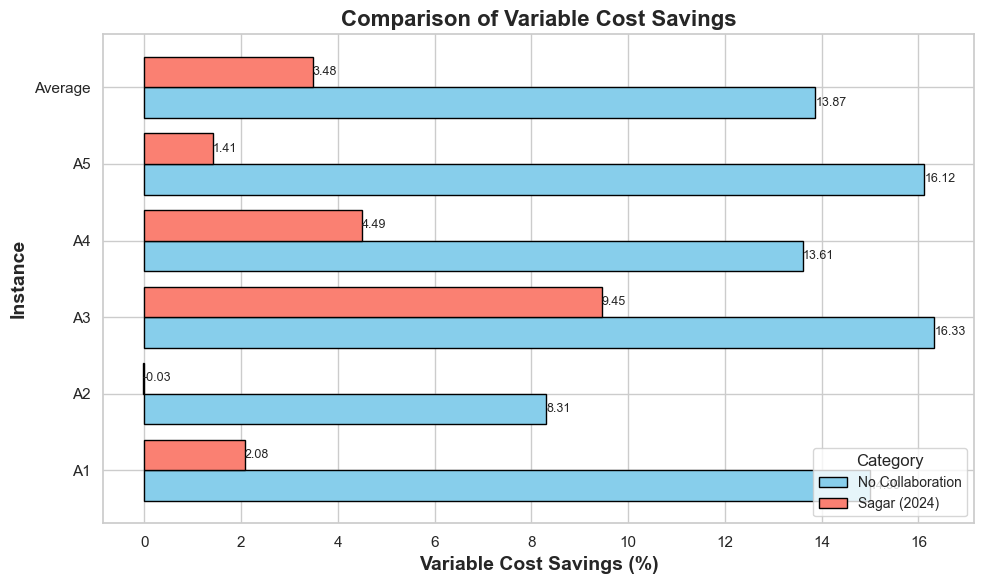

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
instances = ["A1", "A2", "A3", "A4", "A5", "Average"]
no_collaboration = [14.99, 8.31, 16.33, 13.61, 16.12, 13.87]
pingale_2024 = [2.08, -0.03, 9.45, 4.49, 1.41, 3.48]

# Set positions for the bars
y_pos = np.arange(len(instances))  # Numeric positions for instances
bar_width = 0.4  # Width of each bar

# Create the plot
plt.figure(figsize=(10, 6))

# Plot horizontal bars for "No Collaboration"
plt.barh(y_pos - bar_width / 2, no_collaboration, bar_width, label="No Collaboration", color="skyblue", edgecolor="black")

# Plot horizontal bars for "Pingale et al. (2024)"
plt.barh(y_pos + bar_width / 2, pingale_2024, bar_width, label="Sagar (2024)", color="salmon", edgecolor="black")

# Add labels and title
plt.xlabel("Variable Cost Savings (%)", fontsize=14, fontweight="bold")
plt.ylabel("Instance", fontsize=14, fontweight="bold")
plt.title("Comparison of Variable Cost Savings", fontsize=16, fontweight="bold")
plt.yticks(y_pos, instances)
plt.legend(title="Category", fontsize=10, title_fontsize=12, loc="lower right")

# Add value annotations
for i, (no_colab, pingale) in enumerate(zip(no_collaboration, pingale_2024)):
    plt.text(no_colab, i - bar_width / 2, f"{no_colab:.2f}", va="center", ha="left", fontsize=9)
    plt.text(pingale, i + bar_width / 2, f"{pingale:.2f}", va="center", ha="left", fontsize=9)

# Adjust layout
plt.tight_layout()
plt.show()


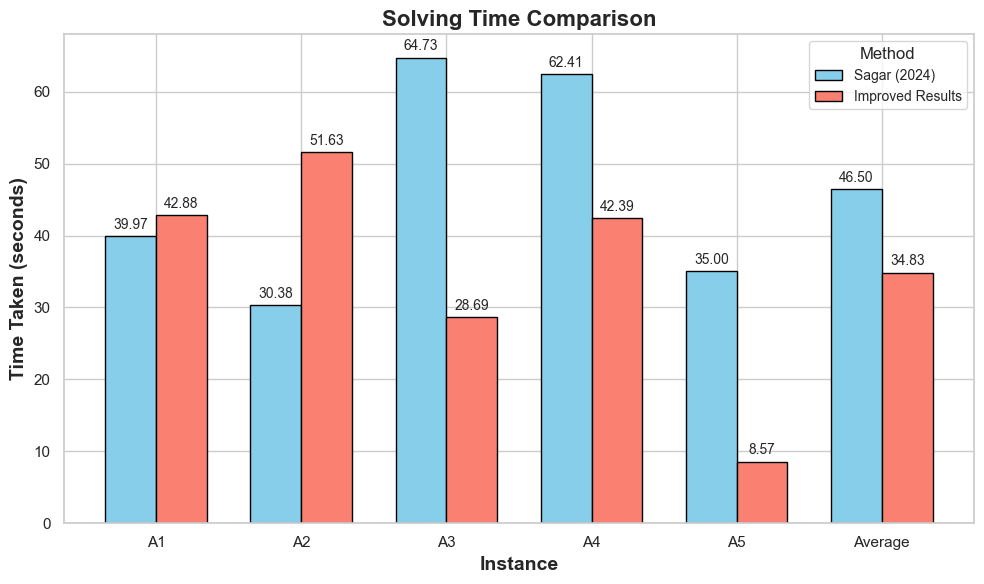

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
instances = ["A1", "A2", "A3", "A4", "A5", "Average"]
sagar_2024 = [39.97, 30.38, 64.73, 62.41, 35, 46.498]
improved_results = [42.88, 51.63, 28.69, 42.39, 8.57, 34.832]

# Set positions for the bars
x_pos = np.arange(len(instances))  # Numeric positions for instances
bar_width = 0.35  # Width of each bar

# Create the plot
plt.figure(figsize=(10, 6))

# Plot bars for "Sagar (2024)"
plt.bar(x_pos - bar_width / 2, sagar_2024, bar_width, label="Sagar (2024)", color="skyblue", edgecolor="black")

# Plot bars for "Improved Results"
plt.bar(x_pos + bar_width / 2, improved_results, bar_width, label="Improved Results", color="salmon", edgecolor="black")

# Add labels and title
plt.xlabel("Instance", fontsize=14, fontweight="bold")
plt.ylabel("Time Taken (seconds)", fontsize=14, fontweight="bold")
plt.title("Solving Time Comparison", fontsize=16, fontweight="bold")
plt.xticks(x_pos, instances)
plt.legend(title="Method", fontsize=10, title_fontsize=12)

# Add value annotations
for i, (sagar, improved) in enumerate(zip(sagar_2024, improved_results)):
    plt.text(i - bar_width / 2, sagar + 1, f"{sagar:.2f}", ha='center', fontsize=10)
    plt.text(i + bar_width / 2, improved + 1, f"{improved:.2f}", ha='center', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()
